# Import the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [4]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/model-save/Dataset-Sentiment Analysis (Task-ML Engineer).xlsx')
df.head()

,conversation_text,sentiment
0,company_x এজেন্ট থেকে রং নাম্বারে টাকা গেলে ফে...,neutral
1,company_x গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খব...,negative
2,company_x গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খব...,negative
3,bank_y ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক...,negative
4,bank_y ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক...,negative


In [5]:
df.tail()

,conversation_text,sentiment
94,আমি bank_k ব্যাংক ভিসা কার্ড থেকে আমার company...,negative
95,একটা company_x নাম্বার কোন এন আই ডি নাম্বার থে...,neutral
96,#খুবই_জরুরী_Help_প্লিজ। আমার মোবাইলে আমি আগে c...,negative
97,company_x সেভিংস বাতিল করে কত দিনের মধ্যে টাকা...,neutral
98,company_b সিম থেকে company_a সিমে চলে গেলে (অপ...,neutral


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conversation_text  99 non-null     object
 1   sentiment          99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [7]:
# checking missing values
df.isnull().sum()

,0
conversation_text,0
sentiment,0


In [8]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,45
negative,42
positive,12


# Data Preprocessing

### *Preprocess the conversation text: this function remove the stop words, special characters, extra space and coverting the text to lowercase*

In [11]:
# Download stopwords
nltk.download('stopwords')


# Preprocessing the conversation text ( convert to lowercase, remove special characters, and stopwords)
def preprocess_conversation_text(conversation_text):
    conversation_text = conversation_text.lower()
    # conversation_text = re.sub(r'\W', ' ', conversation_text)
    # conversation_text = re.sub(r'\s+', ' ', conversation_text)
    conversation_text = re.sub(r'[^\w\s]', '', conversation_text)
    # conversation_text = re.sub(r'[^\x00-\x7F]+', '', conversation_text)
    # conversation_text = re.sub(r'[0-9]', '', conversation_text)

    stop_words = set(stopwords.words('bengali'))
    tokens = conversation_text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Apply the preprocessing function: preprocess_conversation_text
df['cleaned_conversation_text'] = df['conversation_text'].apply(preprocess_conversation_text)

In [13]:
# Display the cleaned text
df[['conversation_text', 'cleaned_conversation_text', 'sentiment']].head()

,conversation_text,cleaned_conversation_text,sentiment
0,company_x এজেন্ট থেকে রং নাম্বারে টাকা গেলে ফে...,company_x এজনট থক নমবর টক গল ফরত নওয়র কন উপয় আ...,neutral
1,company_x গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খব...,company_x গরহকদর জনয খবই দখ জনক একট খবর আপন যদ...,negative
2,company_x গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খব...,company_x গরহকদর জনয খবই দখ জনক একট খবর আপন যদ...,negative
3,bank_y ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক...,bank_y বযক ঘষন দয়ছ য করড দয় কযশ উততলন বনধ তমন ...,negative
4,bank_y ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক...,bank_y বযক ঘষন দয়ছ য করড দয় কযশ উততলন বনধ তমন ...,negative


In [14]:
# Convert the class labels categorical values to numerical values [Positive (2) vs Negative (0) vs Neutral (1)]
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [15]:
df

,conversation_text,sentiment,cleaned_conversation_text
0,company_x এজেন্ট থেকে রং নাম্বারে টাকা গেলে ফে...,1,company_x এজনট থক নমবর টক গল ফরত নওয়র কন উপয় আ...
1,company_x গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খব...,0,company_x গরহকদর জনয খবই দখ জনক একট খবর আপন যদ...
2,company_x গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খব...,0,company_x গরহকদর জনয খবই দখ জনক একট খবর আপন যদ...
3,bank_y ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক...,0,bank_y বযক ঘষন দয়ছ য করড দয় কযশ উততলন বনধ তমন ...
4,bank_y ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক...,0,bank_y বযক ঘষন দয়ছ য করড দয় কযশ উততলন বনধ তমন ...
...,...,...,...
94,আমি bank_k ব্যাংক ভিসা কার্ড থেকে আমার company...,0,আম bank_k বযক ভস করড থক আমর company_x একউনট এড...
95,একটা company_x নাম্বার কোন এন আই ডি নাম্বার থে...,1,একট company_x নমবর কন এন ড নমবর থক খল যব কsee ...
96,#খুবই_জরুরী_Help_প্লিজ। আমার মোবাইলে আমি আগে c...,0,খবই_জরর_help_পলজ আমর মবইল আম আগ company_x অযপস...
97,company_x সেভিংস বাতিল করে কত দিনের মধ্যে টাকা...,1,company_x সভস বতল কর দনর মধয টক পওয় যব টক cash...


In [16]:
df['sentiment'].value_counts()

,count
sentiment,
1,45
0,42
2,12


# Exploratory Data Analysis (EDA)


### *Distribution of Positive (2) vs Negative (0) vs Neutral (1) Sentiments. In this visualization represents the distribution of Positive (2) vs Negative (0) vs Neutral (1) Sentiments in the  dataset and count plot is used to show the number of emails in each category.*


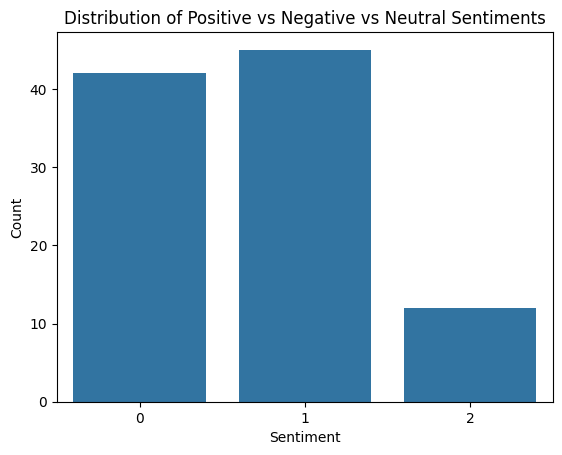

In [17]:
# Distribution of  Positive (2) vs Negative (0) vs Neutral (1) Sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Positive vs Negative vs Neutral Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [18]:
# Bengali font
bangla_font_path = '/content/drive/MyDrive/model-save/kalpurush.ttf'

### *Write a function to generate word cloud sentiment with Bengali font*





In [21]:
from wordcloud import WordCloud

# Generate word cloud for Positive (2) vs Negative (0) vs Neutral (1) Sentiments
def generate_wordcloud_sentiment_class(sentiment_class, bangla_font_path):
    c_text = ' '.join(df[df['sentiment'] == sentiment_class]['cleaned_conversation_text'].astype(str))
    w_cloud = WordCloud(width=800, height=400, background_color='white', max_words=100, font_path=bangla_font_path).generate(c_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(w_cloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_class} Sentiment', fontsize=16)
    plt.axis('off')
    plt.show()


### *WordCloud Analysis for Positive sentiments conversation text. This below visualization generate a word cloud to represent the most common words in Positive sentiments. In this visualization basically highlights key differences in vocabulary between Positive, Neutral, and Negative sentiments. It represents common words in Positive sentiments.*

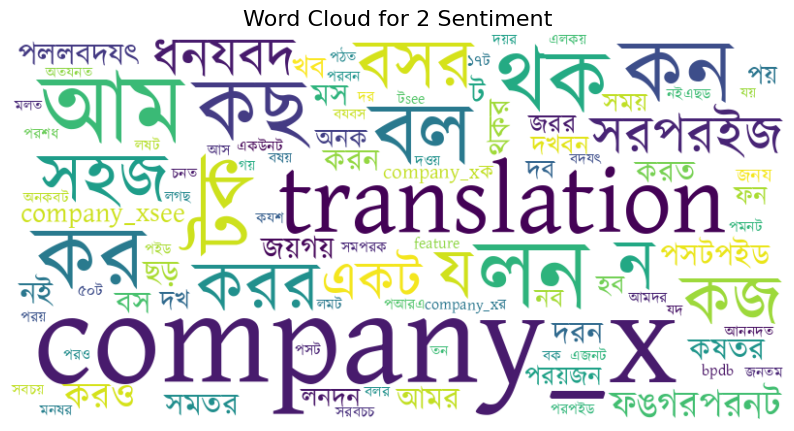

In [22]:
# Word Cloud for Positive (2) Sentiment
generate_wordcloud_sentiment_class(2, bangla_font_path)


### *WordCloud Analysis for Neutral sentiments conversation text. This below visualization generate a word cloud to represent the most common words in Neutral sentiments. It represents common words in Neutral sentiments include more formal and topic-specific terms. In this visualization basically highlights key differences in vocabulary between Neutral, Positive and Negative sentiments.*


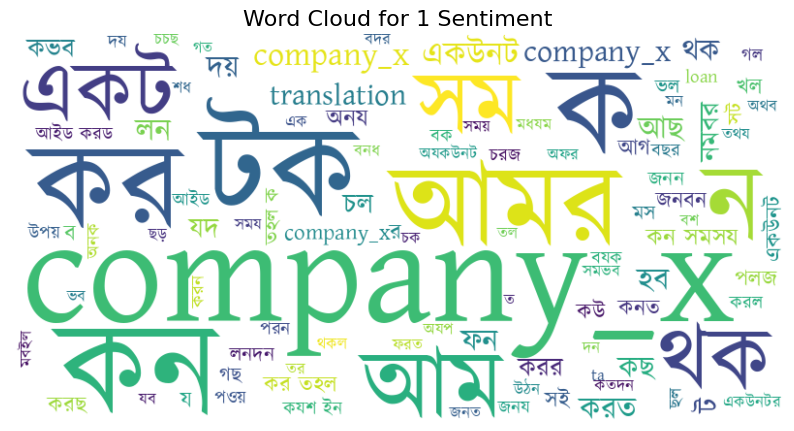

In [23]:
# Word Cloud for Neutral (1) Sentiment
generate_wordcloud_sentiment_class(1, bangla_font_path)

### *WordCloud Analysis for Negative sentiments conversation text. This below visualization generate a word cloud to represent the most common words in Negative sentiments. It represents common words in Negative sentiments include more formal and topic-specific terms. In this visualization basically highlights key differences in vocabulary between Negative, Positive and Neutral sentiments.*

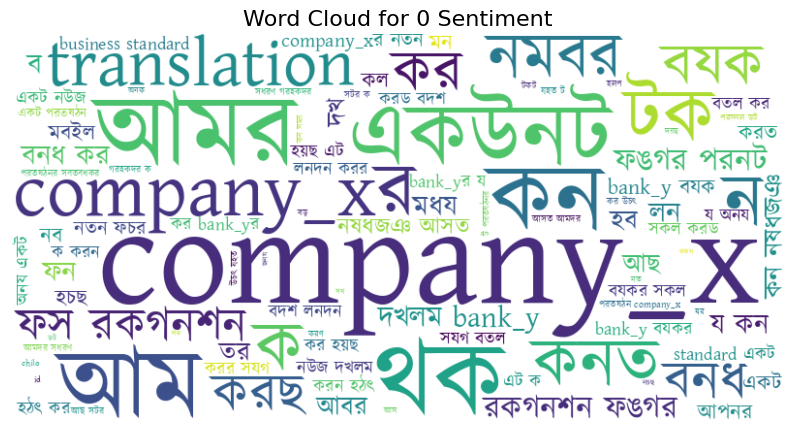

In [24]:
# Word Cloud for Negative (0) Sentiment
generate_wordcloud_sentiment_class(0, bangla_font_path)

### *The below histogram visualizes the distribution of review lengths across different sentiment categories: Positive, Neutral, and Negative. It provides a better understanding of the relationship between sentiment and review conversation text length*




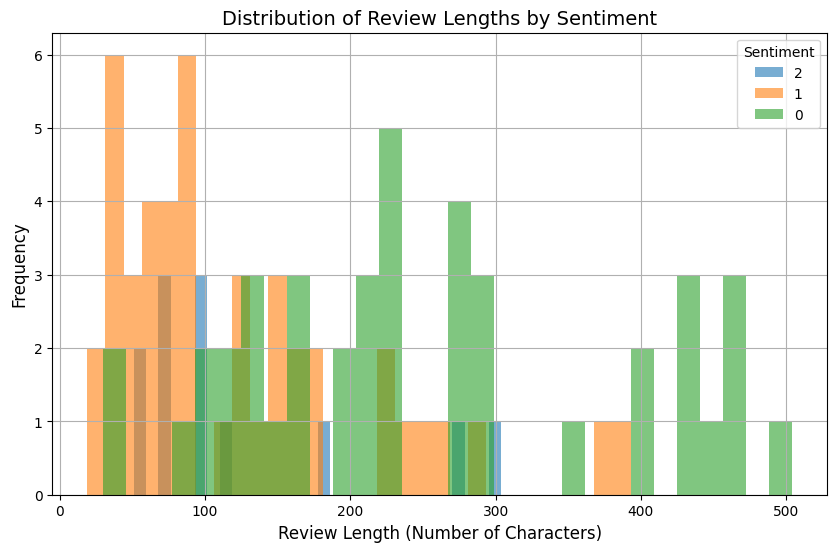

In [25]:
# Add a column for the length of each text review
df['conversation_text_length'] = df['cleaned_conversation_text'].astype(str).apply(len)

plt.figure(figsize=(10, 6))

# Plotting histograms for each sentiment
for sentiment in [2, 1, 0]:
    subset = df[df['sentiment'] == sentiment]
    plt.hist(subset['conversation_text_length'], bins=30, alpha=0.6, label=sentiment)

plt.title('Distribution of Review Lengths by Sentiment', fontsize=14)
plt.xlabel('Review Length (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()


# Feature Engineering and Data Spliting to prepare for model

### *Data Spliting to prepare for model traing and split the train data into training and testing set*s

In [26]:
X = df['cleaned_conversation_text']
y = df['sentiment']

In [27]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (99,)
y.shape:  (99,)


In [28]:
# Train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *Feature extraction with TF-IDF (Term Frequency-Inverse Document Frequency). It converts the cleaned conversation text to numerical features.*

In [29]:
# Feature extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

# OverSampling to handle the imbalanced dataset

### *To handle the imbalanced dataset: Applying SMOTE technique, the minority classes (negative and neutral sentiments) are oversampled to match the majority class (positive sentiment).*

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(tfidf_X_train, y_train)

In [31]:
# Display the new class distribution after SMOTE
from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

Original class distribution: Counter({0: 36, 1: 34, 2: 9})
Resampled class distribution: Counter({1: 36, 0: 36, 2: 36})


# Build the Sentiment Analysis Model


### *Train the Logistic Regression Model*




In [32]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)
lr_preds = lr_model.predict(tfidf_X_test)


### *Evaluate the Logistic Regression Model*

In [33]:
print("Logistic Regression Performance")
print(f'Accuracy of Logistic Regression: {accuracy_score(y_test, lr_preds):.4f}')
print(classification_report(y_test, lr_preds))

Logistic Regression Performance
Accuracy of Logistic Regression: 0.7000
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.80      0.73      0.76        11
           2       1.00      0.33      0.50         3

    accuracy                           0.70        20
   macro avg       0.79      0.63      0.64        20
weighted avg       0.76      0.70      0.69        20



In [35]:
import joblib

# Save the model using joblib
joblib.dump(lr_model, '/content/drive/MyDrive/model-save/lr_model.joblib')

['/content/drive/MyDrive/model-save/lr_model.joblib']


### *Confusion Matrix of the Logistic Regression Model*

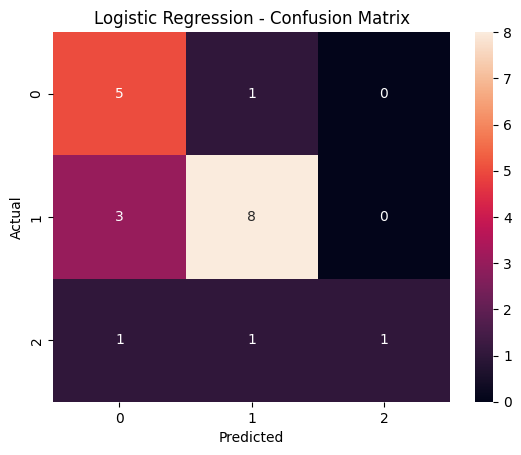

In [38]:
cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm,annot=True, fmt = 'g')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### *Train the Naive Bayes Model*

In [39]:

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb_model.predict(tfidf_X_test)


### *Evaluate the Naive Bayes Model*

In [40]:
# Naive Bayes performance
print("Naive Bayes Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.82      0.82      0.82        11
           2       1.00      0.67      0.80         3

    accuracy                           0.80        20
   macro avg       0.84      0.77      0.80        20
weighted avg       0.81      0.80      0.80        20



In [41]:
import joblib

# Save the model using joblib
joblib.dump(nb_model, '/content/drive/MyDrive/model-save/nb_model.joblib')

['/content/drive/MyDrive/model-save/nb_model.joblib']


### *Confusion Matrix of the Naive Bayes Model*

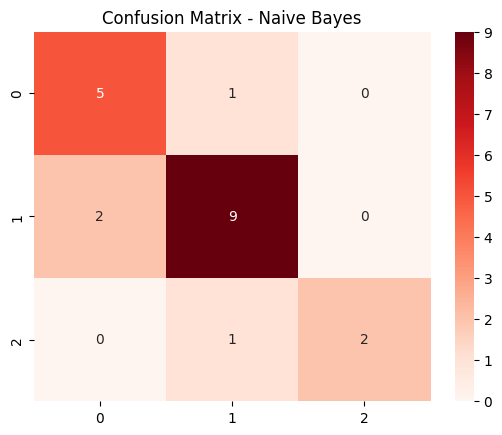

In [42]:
# Confusion matrix for Naive Bayes
confusion_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(confusion_nb, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()